In [81]:
%cd ~/SSMuLA

Loading BokehJS ...

Loading BokehJS ...

/disk2/fli/SSMuLA


In [5]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
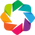

Loading BokehJS ...

Loading BokehJS ...

In [8]:
from SSMuLA.get_corr import LANDSCAPE_ATTRIBUTES, val_list

In [72]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from matplotlib.colors import LinearSegmentedColormap, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
len(LANDSCAPE_ATTRIBUTES)

33

In [15]:
# Function to apply different gradients
def apply_gradient(s, colormap='YlGnBu', mse_colormap='coolwarm'):
    # Copy to avoid modifying the original data
    is_mse = s.name == 'mse'
    if is_mse:
        return [f'background-color: {x}' for x in sns.color_palette(mse_colormap, len(s))]
    else:
        return [f'background-color: {x}' for x in sns.color_palette(colormap, len(s))]


In [78]:
# Custom colormap for the MSE row, using greens
colors = ["#FFFFFF", "#9bbb59"]  # dark to light green
cmap_mse = LinearSegmentedColormap.from_list("mse_cmap_r", colors[::-1], N=100)

# def text_color(val):
#     rgb = to_rgb(cmap_mse(val))
#     # Perceived luminance formula: 0.299*R + 0.587*G + 0.114*B
#     luminance = 0.299*rgb[0] + 0.587*rgb[1] + 0.114*rgb[2]
#     return 'white' if luminance < 0.5 else 'black'

# Styling the DataFrame
def style_dataframe(df):
    # Define a function to apply gradient selectively
    def apply_gradient(row):
        if row.name == 'mse':
            # Generate colors for the MSE row based on its values
            norm = plt.Normalize(row.min(), row.max())
            rgba_colors = [cmap_mse(norm(value)) for value in row]
            return [f'background-color: rgba({int(rgba[0]*255)}, {int(rgba[1]*255)}, {int(rgba[2]*255)}, {rgba[3]})' for rgba in rgba_colors]
        else:
            return [''] * len(row)  # No style for other rows
    
    # Apply gradient across all rows
    styled_df = df.style.background_gradient(cmap='Blues')
    # Apply the custom gradient to the MSE row
    styled_df = styled_df.apply(apply_gradient, axis=1)
    return styled_df.format("{:.2f}").apply(lambda x: ['color: black' if x.name == 'mse' else '' for _ in x], axis=1)


In [88]:
df = pd.read_csv("results/corr/384/boosting|ridge-top96/merge_all.csv")

# Load your dataset
# data = pd.read_csv('path_to_your_data.csv')

# Select features and targets
features = df[LANDSCAPE_ATTRIBUTES]
targets = df[val_list]

importance_df_list = []

# Splitting the dataset for each target and fitting a model
for target in targets.columns:
    X_train, X_test, y_train, y_test = train_test_split(features, targets[target], test_size=0.2, random_state=42)
    
    # Model initialization and training
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Prediction and performance evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    # print(f'Model for {target}, Mean Squared Error: {mse}')
    
    # Feature importance
    feature_importances = pd.DataFrame(model.feature_importances_,
                                       index = X_train.columns,
                                       columns=[target])
    feature_importances.loc["mse"] = mse
    importance_df_list.append(feature_importances)
importance_df = pd.concat(importance_df_list, axis=1)

In [79]:
style_dataframe(importance_df)

,single_step_DE_mean_all,single_step_DE_median_all,single_step_DE_mean_top96,single_step_DE_median_top96,single_step_DE_mean_top384,single_step_DE_median_top384,single_step_DE_fraction_max,recomb_SSM_mean_all,recomb_SSM_median_all,recomb_SSM_mean_top96,recomb_SSM_median_top96,recomb_SSM_mean_top384,recomb_SSM_median_top384,recomb_SSM_fraction_max,top96_SSM_mean_all,top96_SSM_median_all,top96_SSM_mean_top96,top96_SSM_median_top96,top96_SSM_mean_top384,top96_SSM_median_top384,top96_SSM_fraction_max,top_maxes,top_means,ndcgs,rhos,if_truemaxs,maxes_Triad,means_Triad,ndcgs_Triad,rhos_Triad,if_truemaxs_Triad,maxes_ev,means_ev,ndcgs_ev,rhos_ev,if_truemaxs_ev,maxes_esm,means_esm,ndcgs_esm,rhos_esm,if_truemaxs_esm,maxes_esmif,means_esmif,ndcgs_esmif,rhos_esmif,if_truemaxs_esmif,mlde_single_step_DE_delta,mlde_recomb_SSM_delta,mlde_top96_SSM_delta,Triad_single_step_DE_delta,Triad_recomb_SSM_delta,Triad_top96_SSM_delta,ev_single_step_DE_delta,ev_recomb_SSM_delta,ev_top96_SSM_delta,esm_single_step_DE_delta,esm_recomb_SSM_delta,esm_top96_SSM_delta,esmif_single_step_DE_delta,esmif_recomb_SSM_delta,esmif_top96_SSM_delta,delta_ft_mlde,delta_ft_de
n_site,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.01,0.00,0.04,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
numb_measured,0.04,0.02,0.01,0.01,0.00,0.01,0.17,0.25,0.19,0.00,0.01,0.00,0.02,0.03,0.11,0.01,0.02,0.02,0.01,0.02,0.25,0.20,0.02,0.02,0.01,0.24,0.13,0.01,0.02,0.01,0.34,0.16,0.01,0.02,0.02,0.48,0.33,0.02,0.02,0.01,0.29,0.15,0.01,0.03,0.02,0.49,0.05,0.01,0.01,0.00,0.03,0.01,0.01,0.00,0.02,0.01,0.00,0.01,0.01,0.01,0.01,0.02,0.00
percent_measured,0.08,0.12,0.11,0.09,0.07,0.09,0.01,0.03,0.08,0.10,0.11,0.14,0.13,0.10,0.07,0.11,0.15,0.15,0.15,0.15,0.06,0.08,0.03,0.04,0.00,0.04,0.14,0.02,0.08,0.01,0.01,0.11,0.03,0.05,0.01,0.01,0.08,0.01,0.02,0.02,0.01,0.12,0.03,0.04,0.04,0.01,0.02,0.01,0.02,0.03,0.02,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.07,0.01
numb_active,0.04,0.04,0.08,0.08,0.04,0.08,0.02,0.02,0.02,0.10,0.04,0.09,0.02,0.12,0.02,0.04,0.06,0.04,0.07,0.04,0.02,0.03,0.02,0.02,0.01,0.03,0.05,0.02,0.07,0.02,0.11,0.04,0.02,0.05,0.01,0.05,0.03,0.03,0.12,0.00,0.08,0.04,0.03,0.05,0.01,0.07,0.02,0.00,0.02,0.01,0.00,0.00,0.02,0.01,0.00,0.02,0.01,0.01,0.02,0.00,0.00,0.04,0.00
percent_active,0.03,0.02,0.05,0.04,0.03,0.04,0.01,0.06,0.03,0.07,0.04,0.05,0.03,0.05,0.01,0.02,0.02,0.03,0.02,0.03,0.01,0.00,0.06,0.02,0.05,0.01,0.03,0.06,0.00,0.05,0.00,0.02,0.06,0.03,0.06,0.01,0.03,0.04,0.03,0.03,0.00,0.04,0.03,0.01,0.03,0.00,0.01,0.00,0.01,0.02,0.01,0.00,0.02,0.00,0.01,0.02,0.01,0.02,0.02,0.01,0.01,0.01,0.01
active_fit_min,0.02,0.02,0.01,0.00,0.00,0.00,0.07,0.02,0.02,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.07,0.00,0.03,0.03,0.02,0.07,0.01,0.04,0.01,0.01,0.01,0.04,0.03,0.01,0.02,0.01,0.02,0.03,0.01,0.05,0.02,0.03,0.03,0.04,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.01
parent_fit,0.03,0.06,0.01,0.00,0.00,0.00,0.02,0.01,0.01,0.00,0.02,0.01,0.06,0.01,0.02,0.02,0.02,0.01,0.03,0.01,0.01,0.01,0.01,0.05,0.01,0.02,0.01,0.02,0.08,0.00,0.02,0.00,0.01,0.04,0.00,0.03,0.01,0.01,0.03,0.00,0.02,0.01,0.02,0.08,0.00,0.02,0.04,0.09,0.01,0.02,0.04,0.00,0.01,0.04,0.00,0.00,0.04,0.00,0.00,0.01,0.00,0.02,0.03
parent_rank,0.08,0.12,0.00,0.01,0.05,0.01,0.02,0.04,0.04,0.02,0.15,0.07,0.15,0.05,0.12,0.15,0.16,0.16,0.15,0.16,0.11,0.08,0.01,0.09,0.00,0.05,0.01,0.01,0.18,0.01,0.01,0.01,0.02,0.07,0.00,0.01,0.01,0.02,0.11,0.01,0.01,0.00,0.01,0.09,0.02,0.02,0.00,0.00,0.01,0.01,0.01,0.03,0.00,0.01,0.03,0.00,0.01,0.03,0.00,0.01,0.03,0.11,0.01
parent_rank_percent,0.06,0.04,0.02,0.02,0.03,0.02,0.01,0.02,0.05,0.01,0.08,0.02,0.05,0.03,0.06,0.08,0.10,0.06,0.09,0.06,0.02,0.05,0.01,0.06,0.00,0.03,0.01,0.00,0.06,0.01,0.01,0.02,0.01,0.00,0.00,0.01,0.01,0.01,0.05,0.00,0.00,0.02

In [89]:
X_train, X_test

(    n_site  numb_measured  percent_measured  numb_active  percent_active  \
 12     3.0         7784.0         97.300000       2494.0       32.040082   
 5      3.0         7996.0         99.950000         18.0        0.225113   
 8      3.0         7964.0         99.550000        161.0        2.021597   
 2      3.0         7882.0         98.525000       7248.0       91.956356   
 1      3.0         7882.0         98.525000       6533.0       82.885055   
 13     4.0       159129.0         99.455625       9783.0        6.147842   
 4      3.0         7971.0         99.637500         59.0        0.740183   
 7      3.0         7763.0         97.037500        719.0        9.261883   
 10     3.0         7891.0         98.637500        108.0        1.368648   
 3      4.0       149361.0         93.350625      34545.0       23.128528   
 6      3.0         7994.0         99.925000         35.0        0.437828   
 
     active_fit_min  parent_fit  parent_rank  parent_rank_percent      mea

In [93]:
from sklearn.linear_model import LinearRegression, Ridge

# Train a linear regression model as the surrogate
surrogate_model = LinearRegression()
surrogate_model.fit(X_train, model.predict(X_train))  # Use predictions as the target


LinearRegression()

In [91]:
# Coefficients and intercept
coefficients = surrogate_model.coef_
intercept = surrogate_model.intercept_

# Create formula
formula = f"single_step_DE_mean_all = {intercept:.4f} + " + " + ".join(f"{coef:.4f}*{name}" for coef, name in zip(coefficients, LANDSCAPE_ATTRIBUTES))
print("Approximation Formula:\n", formula)


Approximation Formula:
 single_step_DE_mean_all = -2.5560 + -0.0000*n_site + -0.0000*numb_measured + 0.0377*percent_measured + 0.0003*numb_active + -0.0251*percent_active + -0.0129*active_fit_min + 0.0107*parent_fit + -0.0015*parent_rank + -0.0000*parent_rank_percent + 0.0026*mean + 0.0019*std + -0.0197*range + -0.0030*iqr + -0.0040*std_dev + -0.0004*variance + 0.0323*skewness + -0.0015*kurt + 0.0017*loc + -0.0020*scale + -0.0248*numb_kde_peak + 0.0044*Q1 + 0.0019*Q2 + 0.0014*Q3 + 0.0129*numb_loc_opt + 0.0000*frac_loc_opt_total + 0.0149*frac_loc_opt_hd2_escape_numb + -0.0149*frac_loc_opt_hd2_cannot_escape_numb + -0.1578*numb_loc_opt_norm_cannot_escape + -0.0000*frac_loc_opt_norm_cannot_escape + 0.0060*fraction_non-magnitude + -0.0011*fraction_reciprocal-sign + -0.0176*norm_non-magnitude + -0.0072*norm_reciprocal-sign


In [96]:
pd.DataFrame({"attributes": LANDSCAPE_ATTRIBUTES, "coeff": coefficients}).style.background_gradient(cmap='YlGnBu')

,attributes,coeff
0,n_site,-0.000016
1,numb_measured,-0.000044
2,percent_measured,0.037690
3,numb_active,0.000313
4,percent_active,-0.025092
5,active_fit_min,-0.012878
6,parent_fit,0.010680
7,parent_rank,-0.001476
8,parent_rank_percent,-0.000021
9,mean,0.002604


In [103]:
from sklearn.linear_model import Ridge


In [108]:
df = pd.read_csv("results/corr/384/boosting|ridge-top96/merge_all.csv")

# Load your dataset
# data = pd.read_csv('path_to_your_data.csv')

# Select features and targets
features = df[LANDSCAPE_ATTRIBUTES]
targets = df[val_list]

ridge_df_list = []

# Splitting the dataset for each target and fitting a model
for target in targets.columns:
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(features, df[target])
    
    # Feature importance
    feature_importances = pd.DataFrame(ridge_model.coef_,
                                       index = LANDSCAPE_ATTRIBUTES,
                                       columns=[target])
    
    ridge_df_list.append(feature_importances)
ridge_df = pd.concat(ridge_df_list, axis=1)

In [109]:
ridge_df.style.format("{:.2f}").background_gradient(cmap='YlGnBu')

,single_step_DE_mean_all,single_step_DE_median_all,single_step_DE_mean_top96,single_step_DE_median_top96,single_step_DE_mean_top384,single_step_DE_median_top384,single_step_DE_fraction_max,recomb_SSM_mean_all,recomb_SSM_median_all,recomb_SSM_mean_top96,recomb_SSM_median_top96,recomb_SSM_mean_top384,recomb_SSM_median_top384,recomb_SSM_fraction_max,top96_SSM_mean_all,top96_SSM_median_all,top96_SSM_mean_top96,top96_SSM_median_top96,top96_SSM_mean_top384,top96_SSM_median_top384,top96_SSM_fraction_max,top_maxes,top_means,ndcgs,rhos,if_truemaxs,maxes_Triad,means_Triad,ndcgs_Triad,rhos_Triad,if_truemaxs_Triad,maxes_ev,means_ev,ndcgs_ev,rhos_ev,if_truemaxs_ev,maxes_esm,means_esm,ndcgs_esm,rhos_esm,if_truemaxs_esm,maxes_esmif,means_esmif,ndcgs_esmif,rhos_esmif,if_truemaxs_esmif,mlde_single_step_DE_delta,mlde_recomb_SSM_delta,mlde_top96_SSM_delta,Triad_single_step_DE_delta,Triad_recomb_SSM_delta,Triad_top96_SSM_delta,ev_single_step_DE_delta,ev_recomb_SSM_delta,ev_top96_SSM_delta,esm_single_step_DE_delta,esm_recomb_SSM_delta,esm_top96_SSM_delta,esmif_single_step_DE_delta,esmif_recomb_SSM_delta,esmif_top96_SSM_delta,delta_ft_mlde,delta_ft_de
n_site,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
numb_measured,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
percent_measured,-0.07,-0.11,-0.07,-0.10,-0.10,-0.10,0.00,-0.05,-0.10,-0.09,-0.13,-0.07,-0.11,0.01,-0.09,-0.12,-0.08,-0.11,-0.08,-0.11,-0.04,-0.08,-0.01,0.00,0.00,-0.00,-0.07,-0.02,-0.00,-0.00,-0.02,-0.06,-0.02,0.00,-0.01,-0.01,-0.05,-0.02,0.00,-0.01,0.01,-0.06,-0.02,0.00,-0.00,-0.01,-0.02,-0.03,0.00,-0.01,-0.02,0.02,0.01,-0.01,0.03,0.01,-0.00,0.03,0.01,-0.01,0.03,0.03,-0.00
numb_active,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
percent_active,0.01,0.02,0.00,0.01,0.01,0.01,-0.00,0.02,0.02,0.01,0.01,0.00,0.01,-0.00,0.01,0.01,0.01,0.01,0.01,0.01,-0.02,0.01,0.01,-0.00,-0.00,-0.04,0.00,0.01,-0.00,-0.00,-0.05,0.00,0.01,0.00,-0.00,-0.03,0.00,0.01,0.00,-0.00,-0.04,0.00,0.01,-0.00,-0.01,-0.03,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01
active_fit_min,-0.00,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.01,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,0.00,0.00,-0.01,-0.00,-0.00,-0.00,0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
parent_fit,0.01,0.02,0.00,0.01,0.00,0.01,0.05,0.01,0.01,0.00,0.01,-0.01,0.00,0.04,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.04,0.01,0.01,-0.00,-0.02,0.07,0.00,0.00,-0.00,-0.02,0.05,0.00,0.00,-0.00,-0.02,0.03,0.00,0.00,-0.00,-0.02,0.06,0.01,0.01,0.00,-0.01,0.04,0.00,0.00,0.01,-0.00,-0.01,0.00,-0.00,-0.01,0.00,-0.00,-0.01,0.00,-0.00,-0.00,0.01,-0.01,-0.00
parent_rank,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,

In [110]:
df = pd.read_csv("results/corr/384/boosting|ridge-top96/merge_all.csv")

# Load your dataset
# data = pd.read_csv('path_to_your_data.csv')

# Select features and targets
features = df[LANDSCAPE_ATTRIBUTES]
targets = df[val_list]

lr_df_list = []

# Splitting the dataset for each target and fitting a model
for target in targets.columns:
    lr_model = LinearRegression()
    lr_model.fit(features, df[target])
    
    # Feature importance
    feature_importances = pd.DataFrame(lr_model.coef_,
                                       index = LANDSCAPE_ATTRIBUTES,
                                       columns=[target])
    
    lr_df_list.append(feature_importances)
lr_df = pd.concat(lr_df_list, axis=1)

In [111]:
lr_df.style.format("{:.2f}").background_gradient(cmap='YlGnBu')

,single_step_DE_mean_all,single_step_DE_median_all,single_step_DE_mean_top96,single_step_DE_median_top96,single_step_DE_mean_top384,single_step_DE_median_top384,single_step_DE_fraction_max,recomb_SSM_mean_all,recomb_SSM_median_all,recomb_SSM_mean_top96,recomb_SSM_median_top96,recomb_SSM_mean_top384,recomb_SSM_median_top384,recomb_SSM_fraction_max,top96_SSM_mean_all,top96_SSM_median_all,top96_SSM_mean_top96,top96_SSM_median_top96,top96_SSM_mean_top384,top96_SSM_median_top384,top96_SSM_fraction_max,top_maxes,top_means,ndcgs,rhos,if_truemaxs,maxes_Triad,means_Triad,ndcgs_Triad,rhos_Triad,if_truemaxs_Triad,maxes_ev,means_ev,ndcgs_ev,rhos_ev,if_truemaxs_ev,maxes_esm,means_esm,ndcgs_esm,rhos_esm,if_truemaxs_esm,maxes_esmif,means_esmif,ndcgs_esmif,rhos_esmif,if_truemaxs_esmif,mlde_single_step_DE_delta,mlde_recomb_SSM_delta,mlde_top96_SSM_delta,Triad_single_step_DE_delta,Triad_recomb_SSM_delta,Triad_top96_SSM_delta,ev_single_step_DE_delta,ev_recomb_SSM_delta,ev_top96_SSM_delta,esm_single_step_DE_delta,esm_recomb_SSM_delta,esm_top96_SSM_delta,esmif_single_step_DE_delta,esmif_recomb_SSM_delta,esmif_top96_SSM_delta,delta_ft_mlde,delta_ft_de
n_site,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
numb_measured,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
percent_measured,-0.06,-0.13,-0.00,-0.02,-0.02,-0.02,0.03,-0.05,-0.11,-0.10,-0.16,-0.08,-0.13,0.04,-0.09,-0.14,-0.09,-0.13,-0.09,-0.13,-0.00,-0.07,-0.01,0.00,0.02,0.05,-0.03,-0.02,-0.00,0.02,0.06,-0.03,-0.02,0.00,0.01,0.06,-0.02,-0.02,0.00,0.01,0.09,-0.03,-0.02,0.00,0.02,0.05,-0.01,-0.03,0.01,0.03,0.02,0.06,0.04,0.02,0.06,0.04,0.02,0.06,0.04,0.02,0.06,0.05,0.02
numb_active,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
percent_active,0.02,0.01,0.04,0.06,0.06,0.06,0.02,0.02,0.01,0.01,0.00,0.00,-0.00,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.02,0.02,-0.00,0.01,-0.01,0.03,0.01,-0.00,-0.00,-0.01,0.02,0.02,0.00,0.00,0.00,0.02,0.02,0.00,0.00,-0.01,0.03,0.02,0.00,-0.01,0.01,0.00,-0.00,0.01,0.01,0.01,0.01,0.00,-0.00,0.01,0.00,-0.00,0.01,0.01,0.00,0.01,0.00,0.00
active_fit_min,-0.09,0.14,-0.89,-1.18,-1.04,-1.18,-0.32,-0.13,0.14,0.02,0.24,-0.00,0.22,-0.28,-0.09,0.14,-0.01,0.16,-0.01,0.16,-0.38,-0.25,-0.05,-0.00,-0.28,-0.47,-0.60,-0.02,0.00,-0.20,-0.88,-0.48,-0.03,-0.00,-0.23,-0.69,-0.44,-0.04,-0.00,-0.24,-0.71,-0.48,-0.05,-0.00,-0.24,-0.71,-0.16,-0.12,-0.16,-0.50,-0.46,-0.51,-0.38,-0.34,-0.39,-0.35,-0.31,-0.35,-0.39,-0.35,-0.39,-0.24,-0.36
parent_fit,0.15,0.03,0.85,1.15,0.97,1.15,0.74,0.20,-0.04,0.02,-0.16,-0.03,-0.21,0.67,0.09,-0.11,0.02,-0.15,0.02,-0.15,0.79,0.32,0.14,-0.00,0.09,1.18,0.58,0.04,-0.02,0.05,1.36,0.46,0.08,0.00,0.02,1.00,0.44,0.10,0.00,0.07,1.28,0.49,0.14,0.01,0.11,1.11,0.17,0.12,0.24,0.42,0.38,0.49,0.30,0.26,0.37,0.28,0.23,0.35,0.33,0.29,0.40,0.16,0.28
parent_rank,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [92]:
import numpy as np
from sklearn.metrics import r2_score

# Predictions from both models
y_pred_complex = model.predict(X_test)
y_pred_surrogate = surrogate_model.predict(X_test)

# Calculate R-squared score
r2_complex = r2_score(y_test, y_pred_complex)
r2_surrogate = r2_score(y_test, y_pred_surrogate)

print(f"R^2 score for complex model: {r2_complex:.4f}")
print(f"R^2 score for surrogate model: {r2_surrogate:.4f}")


R^2 score for complex model: 0.9224
R^2 score for surrogate model: -10.5631


In [141]:
zs_df = pd.read_csv("results/zs_sum/none/zs_stat_scale2max.csv")
zs_df

,lib,n_mut,scale_type,Triad_score,ev_score,esm_score,esmif_score,struc-comb_score,msanoif-comb_score,msa-comb_score,structnmsa-comb_score
0,DHFR,all,max,"{'rho': 0.017800602737355977, 'ndcg': 0.874706...","{'rho': 0.3396500541186067, 'ndcg': 0.94705812...","{'rho': 0.2997147334642927, 'ndcg': 0.93412887...","{'rho': 0.3420102237927515, 'ndcg': 0.94530250...","{'rho': 0.21873645360229155, 'ndcg': 0.9010558...","{'rho': 0.3329620349497645, 'ndcg': 0.94020086...","{'rho': 0.35054254084284997, 'ndcg': 0.9449015...","{'rho': 0.3152181002051771, 'ndcg': 0.92293221..."
1,GB1,all,max,"{'rho': 0.2882819770014877, 'ndcg': 0.76404913...","{'rho': 0.18950853197890194, 'ndcg': 0.7215575...","{'rho': 0.08033543850645883, 'ndcg': 0.7016796...","{'rho': 0.29349648314848165, 'ndcg': 0.7536404...","{'rho': 0.3165424232001679, 'ndcg': 0.76648219...","{'rho': 0.14175871216515606, 'ndcg': 0.7115697...","{'rho': 0.21368724000610942, 'ndcg': 0.7341220...","{'rho': 0.2591091741511955, 'ndcg': 0.74743562..."
2,ParD2,all,max,"{'rho': 0.22903279275812125, 'ndcg': 0.9096686...","{'rho': 0.43950580411448875, 'ndcg': 0.9509634...","{'rho': 0.5086085705240099, 'ndcg': 0.96848213...","{'rho': 0.5474025505415586, 'ndcg': 0.96654986...","{'rho': 0.4307416392960829, 'ndcg': 0.94590129...","{'rho': 0.5060856131857661, 'ndcg': 0.96738107...","{'rho': 0.5578082401554308, 'ndcg': 0.97195573...","{'rho': 0.5462223690973439, 'ndcg': 0.96811505..."
3,ParD3,all,max,"{'rho': 0.2850094413250776, 'ndcg': 0.92655737...","{'rho': 0.46081667207091903, 'ndcg': 0.9712806...","{'rho': 0.5831577250662513, 'ndcg': 0.98204147...","{'rho': 0.6010278304483516, 'ndcg': 0.96236309...","{'rho': 0.48086112698498235, 'ndcg': 0.9456578...","{'rho': 0.5431052882445438, 'ndcg': 0.97931590...","{'rho': 0.6111206470597818, 'ndcg': 0.97596838...","{'rho': 0.6499730615911018, 'ndcg': 0.97073551..."
4,TrpB3A,all,max,"{'rho': -0.09805055619421527, 'ndcg': 0.981718...","{'rho': 0.1309686909154868, 'ndcg': 0.98910504...","{'rho': 0.1992294634923689, 'ndcg': 0.98892047...","{'rho': 0.1848187734802036, 'ndcg': 0.98972581...","{'rho': 0.04240529262441126, 'ndcg': 0.9850867...","{'rho': 0.16904314947804597, 'ndcg': 0.9893348...","{'rho': 0.1802074618735106, 'ndcg': 0.98954086...","{'rho': 0.11820848404960753, 'ndcg': 0.9865950..."
5,TrpB3B,all,max,"{'rho': -0.006996473076675202, 'ndcg': 0.98392...","{'rho': 0.07449505394200119, 'ndcg': 0.9885023...","{'rho': 0.053334641477870905, 'ndcg': 0.988071...","{'rho': 0.03670935228427115, 'ndcg': 0.9888879...","{'rho': 0.01586836931927659, 'ndcg': 0.9852379...","{'rho': 0.07031237885418128, 'ndcg': 0.9886116...","{'rho': 0.06065981334611515, 'ndcg': 0.9885747...","{'rho': 0.04993095890561982, 'ndcg': 0.9877549..."
6,TrpB3C,all,max,"{'rho': 0.05907320438643337, 'ndcg': 0.9846945...","{'rho': 0.11150958079771961, 'ndcg': 0.9843786...","{'rho': 0.06578349740417924, 'ndcg': 0.9844109...","{'rho': 0.1583678560333045, 'ndcg': 0.98520240...","{'rho': 0.12826386284923846, 'ndcg': 0.9852108...","{'rho': 0.09389268150482442, 'ndcg': 0.9844660...","{'rho': 0.12797819590603884, 'ndcg': 0.9850419...","{'rho': 0.11810772451050155, 'ndcg': 0.9850181..."
7,TrpB3D,all,max,"{'rho': 0.20064421832834228, 'ndcg': 0.9742951...","{'rho': 0.2295252291376624, 'ndcg': 0.98052225...","{'rho': 0.22118235783315962, 'ndcg': 0.9797853...","{'rho': 0.18619806055804317, 'ndcg': 0.9774962...","{'rho': 0.2110467820321757, 'ndcg': 0.97756330...","{'rho': 0.2312909551462471, 'ndcg': 0.98054282...","{'rho': 0.22367560909694612, 'ndcg': 0.9797003...","{'rho': 0.22995407699589082, 'ndcg': 0.9792312..."
8,TrpB3E,all,max,"{'rho': -0.018924718611103345, 'ndcg': 0.97891...","{'rho': 0.04401275888150764, 'ndcg': 0.9913618...","{'rho': 0.053774549927072084, 'ndcg': 0.988008...","{'rho': 0.001764806370509995, 'ndcg': 0.986639...","{'rho': -0.01242743092728458, 'ndcg': 0.980301...","{'rho': 0.050418892269663, 'ndcg': 0.990540469...","{'rho': 0.03718295498648975, 'ndcg': 0.9903196...","{'rho': 0.0237170922261

In [115]:
zs_df.n_mut.unique()

array(['all', 'single', 'double'], dtype=object)

In [121]:
from SSMuLA.zs_analysis import ZS_OPTS, ZS_COMB_OPTS
from SSMuLA.vis_summary import ZS_METRICS, ZS_N_MUTS

In [118]:
ZS_OPTS + ZS_COMB_OPTS

['Triad_score',
 'ev_score',
 'esm_score',
 'esmif_score',
 'struc-comb_score',
 'msanoif-comb_score',
 'msa-comb_score',
 'structnmsa-comb_score']

In [126]:
from ast import literal_eval

In [138]:
# Function to safely parse dictionary strings
def safe_literal_eval(s):
    try:
        # Try evaluating as it is (in case it's already a dict)
        if isinstance(s, dict):
            return s
        # Otherwise, try to parse as a string literal
        return ast.literal_eval(s)
    except ValueError:
        return None  # or handle the error as you see fit


In [131]:
zs_df["Triad_score"][0]

"{'rho': 0.017800602737355977, 'ndcg': 0.8747069361573537, 'rocauc': 0.4522382282943046}"

In [142]:
zs_df['Triad_score'].apply(safe_literal_eval)

0     {'rho': 0.017800602737355977, 'ndcg': 0.874706...
1     {'rho': 0.2882819770014877, 'ndcg': 0.76404913...
2     {'rho': 0.22903279275812125, 'ndcg': 0.9096686...
3     {'rho': 0.2850094413250776, 'ndcg': 0.92655737...
4     {'rho': -0.09805055619421527, 'ndcg': 0.981718...
5     {'rho': -0.006996473076675202, 'ndcg': 0.98392...
6     {'rho': 0.05907320438643337, 'ndcg': 0.9846945...
7     {'rho': 0.20064421832834228, 'ndcg': 0.9742951...
8     {'rho': -0.018924718611103345, 'ndcg': 0.97891...
9     {'rho': 0.0529635806829533, 'ndcg': 0.98353252...
10    {'rho': 0.0551731055848817, 'ndcg': 0.97856767...
11    {'rho': -0.01932984512576195, 'ndcg': 0.981045...
12    {'rho': 0.3208393559355608, 'ndcg': 0.95225575...
13    {'rho': 0.09501963950072509, 'ndcg': 0.9689149...
14    {'rho': -0.28278322925958965, 'ndcg': 0.788353...
15    {'rho': 0.8291971186708028, 'ndcg': 0.93612841...
16    {'rho': 0.5163800793626381, 'ndcg': 0.94235262...
17                                              

In [152]:
zs_name= "Triad"
zs_df[f"{zs_name}_score"].str.replace(": nan", ": None").apply(literal_eval).apply(pd.Series).rename(columns={
    m: f"{zs_name}_{m}" for m in ZS_METRICS
})

,Triad_rho,Triad_ndcg,Triad_rocauc
0,0.017801,0.874707,0.452238
1,0.288282,0.764049,0.715632
2,0.229033,0.909669,0.652049
3,0.285009,0.926557,0.906254
4,-0.098051,0.981719,0.664616
5,-0.006996,0.983923,0.653659
6,0.059073,0.984695,0.621564
7,0.200644,0.974295,0.751696
8,-0.018925,0.978912,0.504706
9,0.052964,0.983533,0.865511


In [154]:
import pandas as pd

zs_df_list = [zs_df[["lib", "n_mut"]]]
# Create new columns for each score type
for c in ZS_OPTS + ZS_COMB_OPTS:
    zs_name= c.replace("_score", "")
    zs_df_list.append(zs_df[f"{zs_name}_score"].str.replace(": nan", ": None").apply(literal_eval).apply(pd.Series).rename(columns={
        m: f"{zs_name}_{m}" for m in ZS_METRICS
    }))
    
zs_df_expend = pd.concat(zs_df_list, axis=1)
zs_df_expend

,lib,n_mut,Triad_rho,Triad_ndcg,Triad_rocauc,ev_rho,ev_ndcg,ev_rocauc,esm_rho,esm_ndcg,...,struc-comb_rocauc,msanoif-comb_rho,msanoif-comb_ndcg,msanoif-comb_rocauc,msa-comb_rho,msa-comb_ndcg,msa-comb_rocauc,structnmsa-comb_rho,structnmsa-comb_ndcg,structnmsa-comb_rocauc
0,DHFR,all,0.017801,0.874707,0.452238,0.339650,0.947058,0.912765,0.299715,0.934129,...,0.717147,0.332962,0.940201,0.891653,0.350543,0.944902,0.906698,0.315218,0.922932,0.850183
1,GB1,all,0.288282,0.764049,0.715632,0.189509,0.721558,0.627690,0.080335,0.701680,...,0.726484,0.141759,0.711570,0.597024,0.213687,0.734122,0.645950,0.259109,0.747436,0.681703
2,ParD2,all,0.229033,0.909669,0.652049,0.439506,0.950963,0.664011,0.508609,0.968482,...,0.705450,0.506086,0.967381,0.694513,0.557808,0.971956,0.720513,0.546222,0.968115,0.728930
3,ParD3,all,0.285009,0.926557,0.906254,0.460817,0.971281,0.705520,0.583158,0.982041,...,0.926475,0.543105,0.979316,0.741303,0.611121,0.975968,0.827177,0.649973,0.970736,0.899314
4,TrpB3A,all,-0.098051,0.981719,0.664616,0.130969,0.989105,0.657328,0.199229,0.988920,...,0.707511,0.169043,0.989335,0.679442,0.180207,0.989541,0.689070,0.118208,0.986595,0.703562
5,TrpB3B,all,-0.006996,0.983923,0.653659,0.074495,0.988502,0.583225,0.053335,0.988071,...,0.626340,0.070312,0.988612,0.630435,0.060660,0.988575,0.617055,0.049931,0.987755,0.634119
6,TrpB3C,all,0.059073,0.984695,0.621564,0.111510,0.984379,0.539872,0.065783,0.984411,...,0.581735,0.093893,0.984466,0.553144,0.127978,0.985042,0.546433,0.118108,0.985018,0.566394
7,TrpB3D,all,0.200644,0.974295,0.751696,0.229525,0.980522,0.785684,0.221182,0.979785,...,0.769547,0.231291,0.980543,0.772225,0.223676,0.979700,0.772081,0.229954,0.979231,0.780714
8,TrpB3E,all,-0.018925,0.978912,0.504706,0.044013,0.991362,0.515337,0.053775,0.988008,...,0.517611,0.050419,0.990540,0.517240,0.037183,0.990320,0.517627,0.023717,0.983216,0.510910
9,TrpB3F,all,0.052964,0.983533,0.865511,0.101850,0.988400,0.873863,0.135039,0.988355,...,0.868882,0.118484,0.988526,0.878611,0.115443,0.988513,0.873769,0.099390,0.989167,0.878365


In [166]:
zs_mut_df_list = [zs_df_expend[zs_df_expend["n_mut"]=="all"]["lib"]]
for n_mut in ZS_N_MUTS:
    slice_df = zs_df_expend[zs_df_expend["n_mut"] == n_mut].drop(columns=["lib", "n_mut"]).reset_index(drop=True)
    zs_mut_df_list.append(slice_df.rename(columns={c: f"{n_mut}_{c}" for c in slice_df.columns}))
zs_mut_df = pd.concat(zs_mut_df_list, axis=1)

In [167]:
zs_mut_df

,lib,all_Triad_rho,all_Triad_ndcg,all_Triad_rocauc,all_ev_rho,all_ev_ndcg,all_ev_rocauc,all_esm_rho,all_esm_ndcg,all_esm_rocauc,...,single_struc-comb_rocauc,single_msanoif-comb_rho,single_msanoif-comb_ndcg,single_msanoif-comb_rocauc,single_msa-comb_rho,single_msa-comb_ndcg,single_msa-comb_rocauc,single_structnmsa-comb_rho,single_structnmsa-comb_ndcg,single_structnmsa-comb_rocauc
0,DHFR,0.017801,0.874707,0.452238,0.339650,0.947058,0.912765,0.299715,0.934129,0.848592,...,0.304167,0.583005,0.891175,0.917361,0.553279,0.891577,0.911111,-0.212895,0.800908,0.320833
1,GB1,0.288282,0.764049,0.715632,0.189509,0.721558,0.627690,0.080335,0.701680,0.558014,...,0.916196,0.260675,0.686378,0.588512,0.774073,0.784778,0.897363,0.811746,0.786033,0.916196
2,ParD2,0.229033,0.909669,0.652049,0.439506,0.950963,0.664011,0.508609,0.968482,0.701737,...,0.964912,0.579624,0.970598,0.842105,0.676766,0.977412,0.947368,0.687594,0.988506,0.964912
3,ParD3,0.285009,0.926557,0.906254,0.460817,0.971281,0.705520,0.583158,0.982041,0.755986,...,NaN,0.321146,0.993785,NaN,0.369282,0.995510,NaN,0.337783,0.993260,NaN
4,TrpB3A,-0.098051,0.981719,0.664616,0.130969,0.989105,0.657328,0.199229,0.988920,0.690492,...,0.622685,0.420717,0.964254,0.862269,0.428879,0.967964,0.850694,0.191181,0.877321,0.646991
5,TrpB3B,-0.006996,0.983923,0.653659,0.074495,0.988502,0.583225,0.053335,0.988071,0.659787,...,0.759259,0.379076,0.972673,0.975309,0.352419,0.972462,0.981481,0.176627,0.941640,0.796296
6,TrpB3C,0.059073,0.984695,0.621564,0.111510,0.984379,0.539872,0.065783,0.984411,0.580109,...,1.000000,0.246277,0.926716,0.981818,0.361055,0.959543,1.000000,0.277220,0.954619,0.996970
7,TrpB3D,0.200644,0.974295,0.751696,0.229525,0.980522,0.785684,0.221182,0.979785,0.745673,...,0.672457,0.487255,0.886777,0.745658,0.400376,0.867780,0.682382,0.378123,0.831905,0.699132
8,TrpB3E,-0.018925,0.978912,0.504706,0.044013,0.991362,0.515337,0.053775,0.988008,0.524569,...,0.401722,0.706503,0.950862,0.991392,0.690916,0.932488,0.958393,-0.079639,0.615658,0.467719
9,TrpB3F,0.052964,0.983533,0.865511,0.101850,0.988400,0.873863,0.135039,0.988355,0.880585,...,0.720844,0.448161,0.877278,0.617246,0.376574,0.873086,0.634615,0.501815,0.907523,0.714640
